# Analysis of Ford GoBike System Data
## by Godwin Okemena

## Investigation Overview
The Aim of this investigation is to look at how the key features of Age and Trip duration in seconds influences individual rides made in a bike-sharing system covering the greater San Francisco Bay area.


## Dataset Overview
The data consisted of Trip duration in seconds and attributes of approximately 171,000 Trips. The attributes included Members birth year, gender, as well as additional variables such as user type whether customer or subscriber. About 3000 data points were removed from the analysis due to inconsistencies or missing information.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

C:\Users\DELL PC\anaconda3\envs\analytics\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# load in the dataset into a pandas dataframe
ford_bike = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
#Creating a new copy for the data cleaning operation
ford_bike_1 = ford_bike.copy() 
#Testing Code
ford_bike_1.head()
#Converting columns with quality issues to the appropriate Datatype 
dtype= {'start_time': 'datetime64', 
        'end_time': 'datetime64',
        
        'bike_id': 'object',
        'user_type': 'category',
        
        'start_station_id': 'object',
        'end_station_id': 'object',
        
        'start_station_latitude': 'object',
        'start_station_longitude':  'object',
        'end_station_latitude':  'object',
        'end_station_longitude':  'object',}

ford_bike_1 = ford_bike_1.astype(dtype)
#Dropping data with missing member_gender entries
ford_bike_1 = ford_bike_1[ford_bike_1.member_gender.notnull()]
#Dropping data with missing start_station_id entries
ford_bike_1 = ford_bike_1[ford_bike_1.start_station_id.notnull()]

In [4]:
ford_bike_1['Age'] = ford_bike_1['member_birth_year'].apply(lambda x: 2019 - x)
ford_bike_1.drop(['member_birth_year'], axis = 1, inplace = True)
index_names = ford_bike_1[ ford_bike_1['member_gender'] == 'Other'].index
ford_bike_1.drop(index_names, inplace = True)


## Distribution of User's Age

The Ages in the dataset take on a range of values, from about 18 years at the lowest, to about 140 years at the highest. Plotted on a normal scale, the distribution of User Ages takes on a unimodal shape.

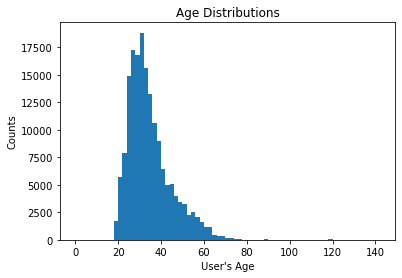

In [5]:
bins = np.arange(0, ford_bike_1['Age'].max()+2, 2)
plt.hist(data=ford_bike_1, x='Age', bins=bins);
plt.title('Age Distributions')
plt.xlabel("User's Age")
plt.ylabel('Counts');

## Distribution of Trip Duration in seconds

Duration in seconds has a long-tailed distribution, with a lot of duration counts on the high time end and few on the low time end. When plotted on a log-scale, the duration distribution produced a unimodal distribution, with peak values between 300 and 900 seconds.

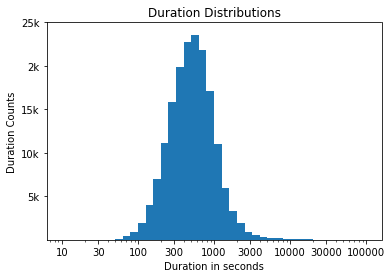

In [6]:
bins = 10 ** np.arange(1, 5+0.1, 0.1)
ticks = [10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data=ford_bike_1, x='duration_sec', bins=bins);
plt.xscale('log')
plt.xticks(ticks, labels)
plt.yticks([5000, 10000, 15000, 20000, 25000], ['5k', '10k', '15k', '2k', '25k'])
plt.title('Duration Distributions')
plt.xlabel('Duration in seconds')
plt.ylabel('Duration Counts');

## Relationship Between Age and Trip Duration in seconds

The Scatter chart of Age against Duration shows a non-linear relationship between both variables. though it is not surprising that as the Age increases from left to right the duration in seconds tends to reduce across the chart.

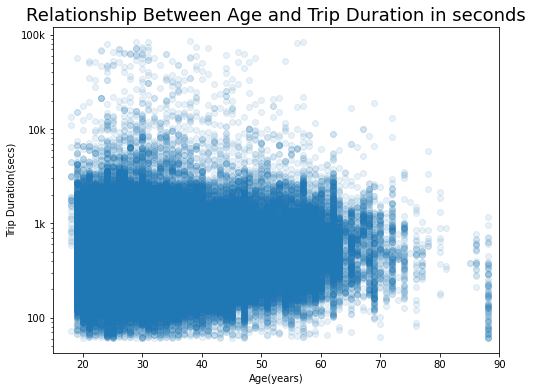

In [7]:
def bivarate_1():
  # plotting
  plt.figure(figsize = [8,6])
  plt.scatter(data = ford_bike_1, x = 'Age', y = 'duration_sec', alpha = 1/10)
  plt.xlim([15, 90])
  plt.xlabel('Age')
  plt.yscale('log')
  plt.yticks([100, 1000, 10000, 100000], [100, '1k', '10k', '100k'])
  plt.ylabel('Trip Duration(secs)')
  plt.title('Relationship Between Age and Trip Duration in seconds', fontsize=18)
  plt.xlabel('Age(years)')

  plt.show()
bivarate_1()

## Average Trip per User Type

The user type and average duration in seconds with Customer type having over 1300 average seconds duration in all trips and Subscriber have over 600 average duration in second. This implies that their casual users travel twice more than their clients in average duration of trips in seconds.

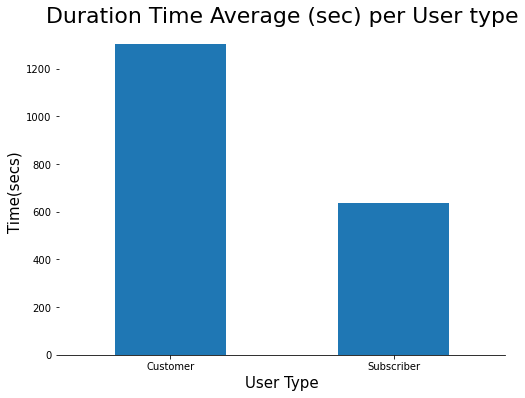

In [8]:
user_duration = ford_bike_1[['user_type', 'duration_sec']].groupby('user_type').mean()
ax = user_duration.plot(kind='bar', figsize=(8,6));

ax.set_title("Duration Time Average (sec) per User type", fontsize=22)
ax.set_ylabel("Time(secs)", fontsize=15)
ax.set_xlabel("User Type", fontsize=15)
plt.xticks(rotation=0)

# Remove unnecessary features 
ax.get_legend().remove() 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show();

## A Relationship of Age, Gender and User Type
Customer and Subscriber have 50% of their male users between 28-40 ages with a few outliers over 60 years. While Subscribers have their 50% of female between ages 30-40 and Customer have their female users between 30-36 years of Age with outliers on both over 50years.

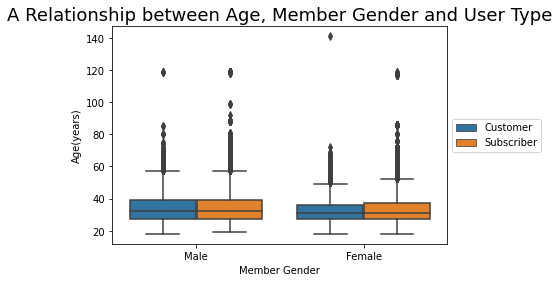

In [9]:
sb.boxplot(data = ford_bike_1, x = 'member_gender', y = 'Age', hue = 'user_type');
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5)) # legend to right of figure
plt.title('A Relationship between Age, Member Gender and User Type', fontsize=18)
plt.ylabel('Age(years)')
plt.xlabel('Member Gender');

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt